In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

In [16]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])
# y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])

In [10]:
len(cv.idxs)

1000

Regressor score: 1.0000


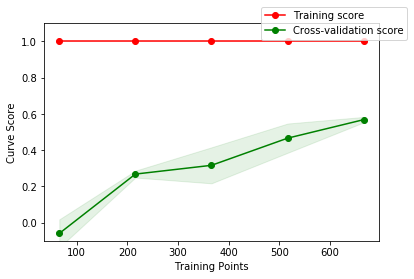

In [17]:
reg = DecisionTreeRegressor()
reg.fit(X,y)
# print "Regressor score: {:.4f}".format(reg.score(X,y))
print("Regressor score: {:.4f}".format(reg.score(X,y)))
 
# TODO: Use learning_curve imported above to create learning curves for both the
#       training data and testing data. You'll need 'cv' and 'score' from above.

# training_sizes, training_scores, testing_scores = (None, None, None)
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=cv, scoring=score)

# TODO: Plot the training curves and the testing curves
#       Use plt.plot twice -- one for each score. Be sure to give them labels!

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot aesthetics
plt.ylim(-0.1, 1.1)
plt.ylabel("Curve Score")
plt.xlabel("Training Points")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

In [14]:
len(train_scores)


5

In [21]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 66 216 366 516 666]
[[ 0.36218325  0.59328986  0.49930879]
 [ 0.43909282  0.35601849  0.35147   ]
 [ 0.465442    0.34180849  0.33881991]
 [ 0.46135935  0.35106821  0.37272985]
 [ 0.45553521  0.36099183  0.38166099]]
[[ 0.29784553  0.41566708  0.39994337]
 [ 0.26205543  0.48275926  0.4260037 ]
 [ 0.27277671  0.47610077  0.42169788]
 [ 0.27947865  0.47460002  0.42434001]
 [ 0.28065733  0.4770514   0.42427891]]
